## Importing Data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("Cleaned_Data.csv")

In [4]:
df.shape

(16849, 6)

In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

Address       Price  NoOfBedrooms  \
0                    Bahria Town Karachi, Karachi   4200000.0           1.0   
1  Bahria Town - Precinct 17, Bahria Town Karachi   5900000.0           2.0   
2            Bahria Paradise, Bahria Town Karachi  42000000.0           5.0   
3                   Askari 5 - Sector J, Askari 5  37500000.0           3.0   
4   Bahria Town - Precinct 35, Bahria Sports City  21000000.0           4.0   

   NoOfBathrooms  AreaSqYards  
0            1.0           60  
1            2.0          161  
2            5.0          500  
3            3.0          300  
4            4.0          350

In [7]:
df["NoOfBathrooms"] = df["NoOfBathrooms"].apply(int)

df["Price"] = df["Price"].apply(int)

In [8]:
df["Price"].max()

400000000

## Plotting Graphs

Text(0, 0.5, 'Price')

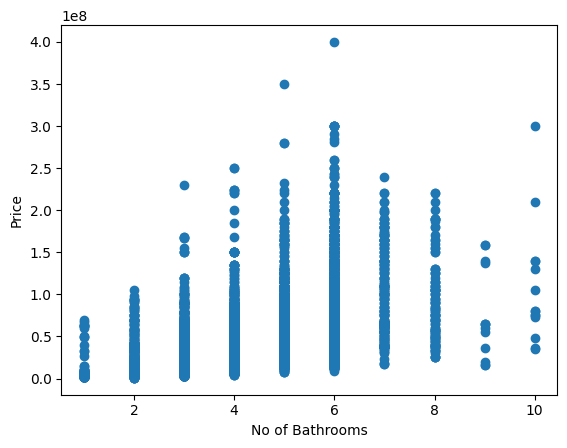

In [9]:
plt.scatter(df["NoOfBathrooms"],df["Price"])
plt.xlabel("No of Bathrooms")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

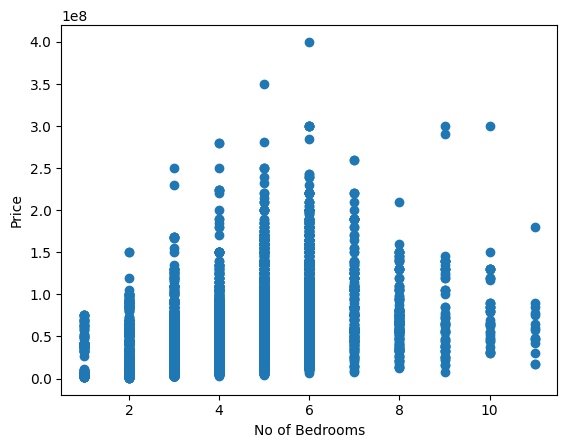

In [10]:
plt.scatter(df["NoOfBedrooms"],df["Price"])
plt.xlabel("No of Bedrooms")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

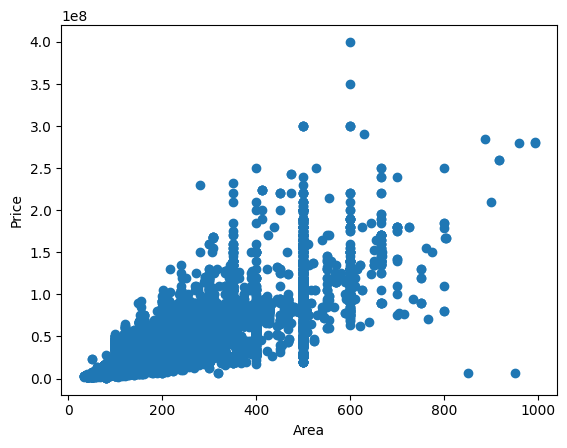

In [11]:
plt.scatter(df["AreaSqYards"],df["Price"])
plt.xlabel("Area")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

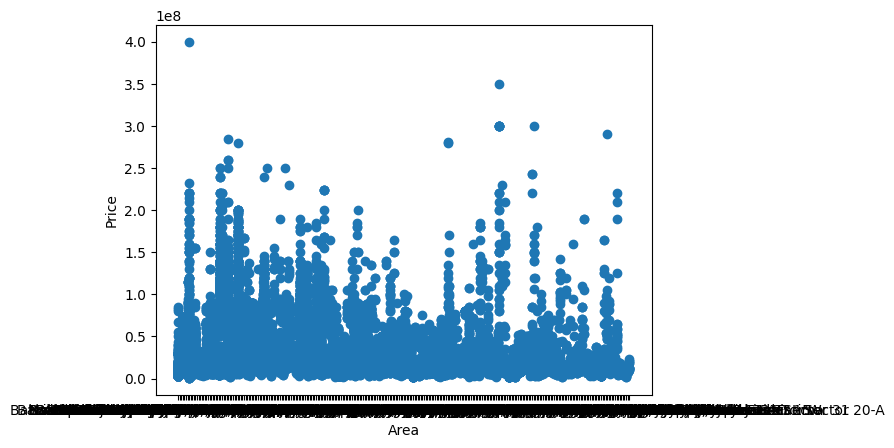

In [12]:
plt.scatter(df["Address"],df["Price"])
plt.xlabel("Area")
plt.ylabel("Price")

In [13]:
df.isna().sum()

Address          0
Price            0
NoOfBedrooms     0
NoOfBathrooms    0
AreaSqYards      0
dtype: int64

In [14]:
df.drop(columns=["Address"],inplace=True)
df.head()

Price  NoOfBedrooms  NoOfBathrooms  AreaSqYards
0   4200000           1.0              1           60
1   5900000           2.0              2          161
2  42000000           5.0              5          500
3  37500000           3.0              3          300
4  21000000           4.0              4          350

In [15]:
df["NoOfBedrooms"] = df["NoOfBedrooms"].apply(int)

df["TotalRooms"] = df["NoOfBathrooms"]+df["NoOfBedrooms"]

In [16]:
df.drop(columns=["NoOfBedrooms","NoOfBathrooms"],inplace=True)

In [17]:
fig = px.scatter_3d(df,x="AreaSqYards",y="TotalRooms",z="Price")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df["Price"].max(),df["TotalRooms"].describe()

(400000000,
 count    16849.000000
 mean         7.338002
 std          2.827358
 min          2.000000
 25%          6.000000
 50%          6.000000
 75%         10.000000
 max         21.000000
 Name: TotalRooms, dtype: float64)

In [ ]:
df.head()

Price  AreaSqYards  TotalRooms
0   4200000           60           2
1   5900000          161           4
2  42000000          500          10
3  37500000          300           6
4  21000000          350           8

In [ ]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
len(y.values),len(x.iloc[:,0].values),len(x.iloc[:,1].values)

(16849, 16849, 16849)

In [ ]:
import plotly.graph_objects as go
x1 = x.iloc[:,0]
x2 = x.iloc[:,1]
# assuming x1, x2 are your feature columns, and y is your output column
fig = go.Figure(data=[go.Scatter3d(x=x.iloc[:,0], y=x.iloc[:,1], z=y, mode='markers')])

# fit the linear regression model
# create a meshgrid of x1 and x2 values
x1_min, x1_max = x1.min() - 1, x1.max() + 1
x2_min, x2_max = x2.min() - 1, x2.max() + 1
x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, step=0.5), np.arange(x2_min, x2_max, step=0.5))

# calculate the predicted values for each point in the meshgrid
y_pred_mesh = lr.intercept_ + lr.coef_[0]*x1_mesh + lr.coef_[1]*x2_mesh

# add the regression plane to the figure
fig.add_trace(go.Surface(x=x1_mesh, y=x2_mesh, z=y_pred_mesh, opacity=0.7))

# set axis labels
fig.update_layout(scene=dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='Y'))

# show the plot
fig.show()


## Score

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
mean_absolute_error(y_test, y_pred)

12776690.491083475

In [ ]:
mean_squared_error(y_test, y_pred)

422125059365203.56

In [ ]:
print("r2 score: ",r2_score(y_test, y_pred)*100)

NameError: name 'r2_score' is not defined

In [ ]:
r2 = r2_score(y_test,y_pred)
adjusted_r2_score = 1-((1-r2)*(x_test.shape[0] -1))/((x_test.shape[0]-1-1))

print("Adjusted R2 Score: ",adjusted_r2_score*100)

Adjusted R2 Score:  68.08677672939247


## Standardizaion

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

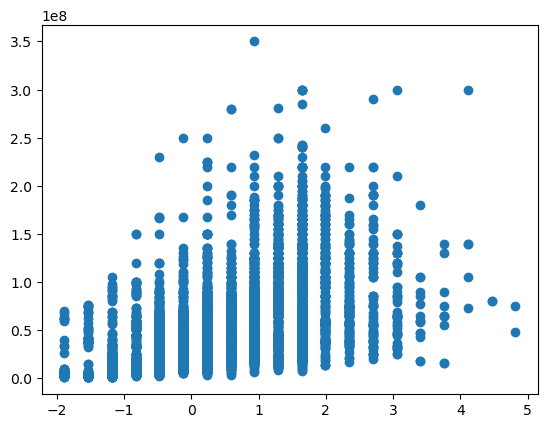

In [ ]:
plt.scatter(pd.DataFrame(x_train_scaled).iloc[:,1],y_train)



In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test_scaled)

In [ ]:
r2_score(y_test, y_pred)

0.6809624933944609